In [1]:
import sys 
sys.path.append("..") 
from collections import Counter
from itertools import combinations
import json

import pandas as pd
import matplotlib.pyplot as plt

from utils import data_helper,result_helper

In [2]:
shot_key_word_json_path='../data/knowledgebase-3.json'

unlabeled_ds_path='../data/train/unlabeled_data_processed.csv'
result_csv_path='../data/train/unlabeled_data_labeled3_plus.csv'
unlabeled_df=pd.read_csv(unlabeled_ds_path,index_col='id')

In [3]:
class_label_to_class_dict = {0: '家居', 1: '房产', 2: '教育', 3: '时尚', 4: '时政', 5: '科技', 6: '财经', 7: '游戏', 8: '娱乐', 9: '体育'}

class_to_class_label_dict={val:key for key,val in class_label_to_class_dict.items()}

with open(shot_key_word_json_path,'r',encoding='utf-8') as f:
    shot_key_word_dict=json.load(fp=f)
shot_key_word_dict={key:list(set(val)) for key,val in shot_key_word_dict.items()}
for key,val in shot_key_word_dict.items():
    print(key)   
    print(val)
    print('\n')

游戏
['女仆', '通关', '宝箱', '血量', '连招', 'buff', '普攻', '攻略', '碎片', '女妖', '玩法', '玩家', '手游', '护盾', '掉落', '崩坏', '游侠', '金币', '游戏', '闪避', '防御', '击杀', '礼包', '攻速', '敌方', '攻击力', '奶妈', '副本', '卡牌', '云顶', '加成', '法师', '大招', '战力', '随机', '射手', '合成']


娱乐
['幕后', '观影', '爱情', '电视剧', '小说', '漫威', '制片人', '看点', '该片', '传媒', '喜剧', '监制', '终结者', '都市', '明星', '影业', '定档', '热播', '粉丝', '改编', '内地', '院线', '剧本', '出演', '执导', '本片', '上映', '影院', '动画', '台词', '蜘蛛侠', '红毯', '首映', '震撼', '剧集', '导演', '编剧', '这部', '悬疑', '好莱坞', '大片', '片中', '演员', 'MV', '热映', '播出', '主创', '演技', '银幕', '出品', '犯罪', '公映', '奥斯卡', '开播', '影视', '该剧', '创作', '电影', '预告片', '科幻', '影片', '亲情', '主角', '卫视', '实力派', '口碑', '片方', '反派', '媒体', '剧照', '提名', '点映', '主演', '饰演', '剧组', '剧中', '票房', '影迷', '演出', '观众们', '特辑', '扮演', '联袂']


体育
['公开赛', '乒乓球', '夺冠', '球场', '体育', '排球', '击球', '巡回赛', '中国女排', '大满贯', '球队', '女排', '奥运', '发球', '单打', '队员', '比分', '马术', '运动员', '孙颖莎', '参赛', '标准杆', 'NBA', '锦标赛', '男排', '世锦赛', '奥运会', '混双', '羽毛球', '高尔夫']




In [4]:
num_words_based=2

keys=[key for key in shot_key_word_dict.keys()]
keys=['体育']

sub_df=pd.DataFrame(columns=['cutted_content','class_label'])
for key in keys: # 
    words_in_other_keys=[]
    for other_key in shot_key_word_dict.keys():
        if key!=other_key:
            words_in_other_keys.extend(shot_key_word_dict[other_key])
    regex_pat_in_this_key='|'.join(str(word) for word in shot_key_word_dict[key])
    filtered_df_with_this_key=unlabeled_df[unlabeled_df['cutted_content'].str.contains(regex_pat_in_this_key,regex=True)]

    regex_pat_in_other_keys='|'.join(str(word) for word in words_in_other_keys)
    words_self_combine_list=list(combinations(shot_key_word_dict[key],num_words_based))
    print(key,len(words_self_combine_list),'combinations')
    for words in words_self_combine_list:
        # print(word)
        # and: '(?=.*subpartA)(?=.*subpartB)'
        regex_pat_in_self_key=''.join('(?=.*'+str(word)+')' for word in words)

        filtered_df=filtered_df_with_this_key[filtered_df_with_this_key['cutted_content'].str.contains(regex_pat_in_self_key,regex=True)]
        filtered_df=filtered_df[~filtered_df['cutted_content'].str.contains(regex_pat_in_other_keys,regex=True)]
        
        filtered_df_with_this_key=filtered_df_with_this_key.drop(index=filtered_df.index)
        print(str(words),len(filtered_df),len(filtered_df_with_this_key))

        filtered_df['class_label']=key
        filtered_df['label']=class_to_class_label_dict[key]
        filtered_df['by_words']=' '.join(str(word) for word in words)
        
        sub_df=sub_df.append(filtered_df)
        
print(len(sub_df))
sub_df=sub_df.drop_duplicates(subset=['content']) # 去除重复的cutted_content
print(len(sub_df))
sub_df.to_csv(result_csv_path,index=False)

体育 435 combinations
('公开赛', '乒乓球') 10 4423
('公开赛', '夺冠') 93 4330
('公开赛', '球场') 80 4250
('公开赛', '体育') 15 4235
('公开赛', '排球') 0 4235
('公开赛', '击球') 18 4217
('公开赛', '巡回赛') 60 4157
('公开赛', '中国女排') 0 4157
('公开赛', '大满贯') 52 4105
('公开赛', '球队') 4 4101
('公开赛', '女排') 0 4101
('公开赛', '奥运') 6 4095
('公开赛', '发球') 14 4081
('公开赛', '单打') 1 4080
('公开赛', '队员') 3 4077
('公开赛', '比分') 3 4074
('公开赛', '马术') 0 4074
('公开赛', '运动员') 1 4073
('公开赛', '孙颖莎') 0 4073
('公开赛', '参赛') 10 4063
('公开赛', '标准杆') 4 4059
('公开赛', 'NBA') 0 4059
('公开赛', '锦标赛') 3 4056
('公开赛', '男排') 0 4056
('公开赛', '世锦赛') 0 4056
('公开赛', '奥运会') 0 4056
('公开赛', '混双') 1 4055
('公开赛', '羽毛球') 0 4055
('公开赛', '高尔夫') 3 4052
('乒乓球', '夺冠') 12 4040
('乒乓球', '球场') 6 4034
('乒乓球', '体育') 33 4001
('乒乓球', '排球') 1 4000
('乒乓球', '击球') 13 3987
('乒乓球', '巡回赛') 3 3984
('乒乓球', '中国女排') 1 3983
('乒乓球', '大满贯') 4 3979
('乒乓球', '球队') 26 3953
('乒乓球', '女排') 0 3953
('乒乓球', '奥运') 8 3945
('乒乓球', '发球') 1 3944
('乒乓球', '单打') 3 3941
('乒乓球', '队员') 0 3941
('乒乓球', '比分') 0 3941
('乒乓球', '马术') 0 3941
('乒乓

dict_keys(['教育', '家居', '时政'])
教育    1753
家居     452
时政     429
Name: class_label, dtype: int64


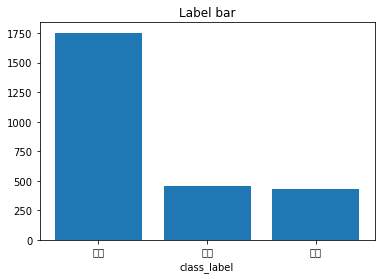

In [5]:
# 类别分布
label_cnts=dict(sub_df['class_label'].value_counts())
plt.bar(label_cnts.keys(),label_cnts.values())
plt.xlabel('class_label')
plt.title('Label bar')
print(label_cnts.keys())
print(sub_df['class_label'].value_counts())

In [6]:
# 补充少的
